# Solving ODEs using Forward Euler, Backward Euler, RK2, and RK4. 

## We will continue to look at the following example
$$ \frac{dy}{dt} = 5 \sin(y), \qquad y(0) = \frac{\pi}{4}.$$

Last time we found the solution using the Forward-Euler method. We then plotted our approximate solution and the exact solution, and finally calculated the error.

<IPython.core.display.Javascript object>


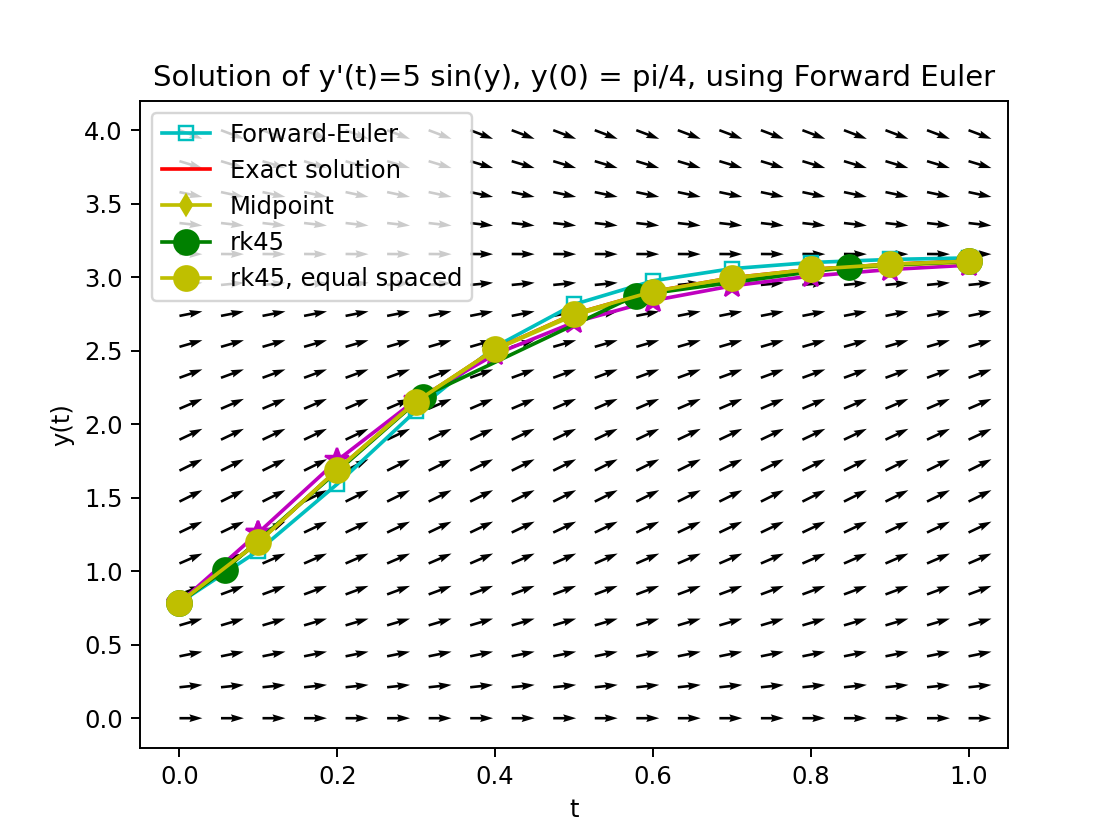

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots() # Create a new figure

## First draw the vector field
# Define tspan, from 0 to 1 with 20 points
tspan = np.linspace(0, 1, 20)
# Define yspan, from 0 to 4 with 20 points
yspan = np.linspace(0, 4, 20)
# Create the meshgrid, T, Y
T, Y = np.meshgrid(tspan, yspan)
# Plot the vector field. Now rise/run = 5 sin(y). 
# In order to make the quiver plot look correct, we need to multiply by dt. 
# You don't need to worry about this difference because you won't have to do this
# on your homework. But the rise here should be dt*5*sin(y)
dt = 0.1
ax.quiver(T, Y, np.ones(T.shape), dt*5*np.sin(Y))

ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.set_title("Solution of y'(t)=5 sin(y), y(0) = pi/4, using Forward Euler")

# Find the Forward-Euler solution using dt=0.1
dt = 0.1
f = lambda y: 5*np.sin(y)

# We will solve for t between 0 and 1 with spacing dt, define t
t = np.arange(0, 1+dt, dt)

# Then predefine the array "y" which will hold our solution.
y = np.zeros(len(t))

# Then setup forward euler with the initial condition, y(0) = pi/4
y[0] = np.pi/4

# And calculate all of the other points in a for loop
for k in range(len(y)-1):
    y[k+1] = y[k] + dt*f(y[k])
    
# Then plot it using open cyan squares with lines in between
ax.plot(t, y, 'cs-', markerfacecolor='none', label='Forward-Euler')

# Plot the exact solution in red
y_exact = lambda z: 2*np.arctan(np.exp(5*z)/(1+np.sqrt(2)))
ax.plot(t, y_exact(t), 'r', label='Exact solution')

ax.legend()

Since decreasing the step size (`dt`) by a factor of 2 decreases the error by a factor of 2, it seems that **the Forward-Euler method has global error $\mathcal{O}(\Delta t)$**. 

To see this, we need to think back to where the error comes from. Remember, the approximation was that
$$ x'(t) \approx \frac{x(t+\Delta t)-x(t)}{\Delta t}.$$
But we **know the error in this approximation:**
$$ x'(t) = \frac{x(t+\Delta t) - x(t)}{\Delta t} + \mathcal{O}(\Delta t),$$
which is first-order accuracy. So we have
$$
f(t_k, x(t_k)) = x'(t_k) = \frac{x(t_k+\Delta t) - x(t_k)}{\Delta t} + \mathcal{O}(\Delta t),
$$
and then multiply through by $\Delta t$ to get
$$
\Delta t f(t_k, x(t_k)) = x(t_{k+1}) - x(t_k) + \mathcal{O}(\Delta t^2),
$$
we have that 
$$ x(t_{k+1}) = x(t_k) + \Delta t f(t_k, x(t_k)) + \mathcal{O}(\Delta t^2).$$
In other words, **if we know exactly what $x(t_k)$ is, then taking one step forward to get $x(t_{k+1})$ results in an $\mathcal{O}(\Delta t^2)$ error.** That is the **local error**. 

**The local (one-step) error for the Forward-Euler method is $\mathcal{O}(\Delta t^2)$**. 

But what we were measuring above is not the *local* error, it is the *global error.* The way we get to *global error* is by noticing that the global error comes from adding up the local error several times. How many times? Exactly $N$ times, where $N = T / \Delta t$ is the number of steps to get from $t=0$ to $t=T$. Therefore the global error is 
$$
\text{Forward Euler Global Error} = N \mathcal{O}(\Delta t^2) = \frac{T}{\Delta t}\mathcal{O}(\Delta t^2) = \mathcal{O}(\Delta t).
$$
In other words **the global error for the Forward-Euler method is $\mathcal{O}(\Delta t)$, or you may say that it is a *first-order accurate method.***

You don't need to know all of these calculations. You just need to know that Forward-Euler has second-order local error and first-order global error. 

## The Backward-Euler method
Now we have said just about all there is to say about Forward Euler, except for stability (we will get to that later). Let's introduce a new method first. 

There is no obvious reason why we had to use a forward difference scheme.  For example, we could just as easily have used the first order backward difference scheme

$x'(t) \approx \frac{x(t) - x(t - \Delta t)}{\Delta t}$.  

This approximation is valid at any time, so in particular it is valid at time $t_1$.  We therefore have 

$x'(t_1) \approx \frac{x(t_1) - x(t_1 - \Delta t)}{\Delta t} = \frac{x(t_1) - x(t_0)}{\Delta t}$.  

If we use this approximation in our differential equation (at time $t_1$), then we get 

$\frac{x(t_1) - x(t_0)}{\Delta t} \approx f(t_1, x(t_1))$.  

We know from the initial condition that $x(t_0) = x_0$.  If we plug this in and do a little simplifying, we get 

$x(t_1) \approx x_0 + \Delta t f(t_1, x(t_1))$.  

Of course, we still don't know what $x(t_1)$ is, but we can use this formula as the definition of our approximation $x_1$: 

$x_1 = x_0 + \Delta t f(t_1, x_1)$.  

This looks almost the same as our formula for the forward Euler method, but there is one very important difference.  **This function is not actually solved for $x_1$ because there is still an $x_1$ on the right hand side.**  We say that this is an *implicit* equation for $x_1$ because we still need to do more work to solve for our next approximation.  In principle, if we know the formula for $f$ (which we always will - it is just the right hand side of our differential equation) then we can solve this equation for $x_1$.  However, it might be very difficult, or even impossible, to solve the equation by hand.  Fortunately, there are many numerical methods (including some builtin python functions) that we can use to solve the equation.  In this lecture, we will just assume that we have solved for $x_1$ and not worry about how to actually do so.  

Just like in the last lecture, we can repeat this process with time $t_2$ instead of $t_1$.  We get the approximation 

$\frac{x(t_2) - x(t_2 - \Delta t)}{\Delta t} \approx f(t_2, x(t_2))$.  

If we simplify this (and use the fact that the $t$'s are evenly spaced) we get 

$x(t_2) \approx x(t_1) + \Delta t f(t_2, x(t_2))$.  

We don't know $x(t_1)$ or $x(t_2)$, but we do already have a good approximation for $x(t_1)$, so we can write 

$x(t_2) \approx x_1 + \Delta t f(t_2, x(t_2))$.  

We will now take this as a definition for the approximation $x_2$, so we have 

$x_2 = x_1 + \Delta t f(t_2, x_2)$.  

Once again, this formula isn't actually solved for $x_2$ yet, but at least in principle we can solve it, so we will assume that we have found $x_2$.  

We can repeat this process indefinitely.  In general, if we already have all the approximations for $x(t)$ up to $x_k$, then we get the formula 

$x_{k+1} = x_k + \Delta t f(t_{k+1}, x_{k+1})$.  

Again, **this is an implicit equation** for $x_{k+1}$.  If the formula for $f$ is relatively simple, then we might be able to find $x_{k+1}$ by hand, but usually we will have to use some python method to approximate the solution.  We call this method for approximating the $x$ values the *backward Euler method*.  It is a time stepping method, because we approximate $x$ at each time and turn and never go back to approximate $x$ at an earlier time again.  We say that the method is *implicit*, because at each step we have to solve an implicit equation for $x_{k+1}$. **This distinction is going to end up being very important.**

Let's implement the backward-Euler method for solving the same problem. This will require more work, so before jumping into a for loop we are going to go step by step.

We are going to solve the same IVP, $y'(t) = 5 \sin(y), ~ y(0) = \pi/4$, with the Backward-Euler method and $\Delta t = 0.1$.

In [2]:
# Define dt = 0.1
dt = 0.1

# Define y0, the initial condition
y0 = np.pi/4

Now we want to find $y_1$. We have $y_1 = y_0 + dt\times f(t_1, y_1) = y_0 + 5dt \sin(y1)$, but we can't solve that explicitly! How can we go about this? Do you remember a time in this class when we used a computer to solve an equation that we could not?

We did this once on the homework for optimization! We need to do *root finding.* In other words, we need to *find* the $y_1$ such that
$$ g(y_1) = y_1 - y_0 - 5 dt \sin(y_1) = 0.$$
The $y_1$ that will do that is the $y_1$ that we want. We do this in python using `scipy.integrate.fsolve`. Let's see how that works.

In [3]:
# First we define an anonymous function for g. 
# Use "z" as your variable (to avoid confusion) and use y0!
g = lambda z: z - y0 - dt*f(z)

# Now we need to find the values of z that solves that equation, and that is y1!
import scipy.optimize
# The syntax for fsolve is 'scipy.optimize.fsolve(anonymous_function, guess)'
# Can you think about what a good guess would be for y1? What about for y2? 
# How can we code this?
y1 = scipy.optimize.fsolve(g, y0) # Use y0 as our guess because we think 
                                  # that y1 is close to y1

Once we have that let's plot our work to verify.

Plot `y0` and `y1` on `ax2` as big magenta stars.

<IPython.core.display.Javascript object>


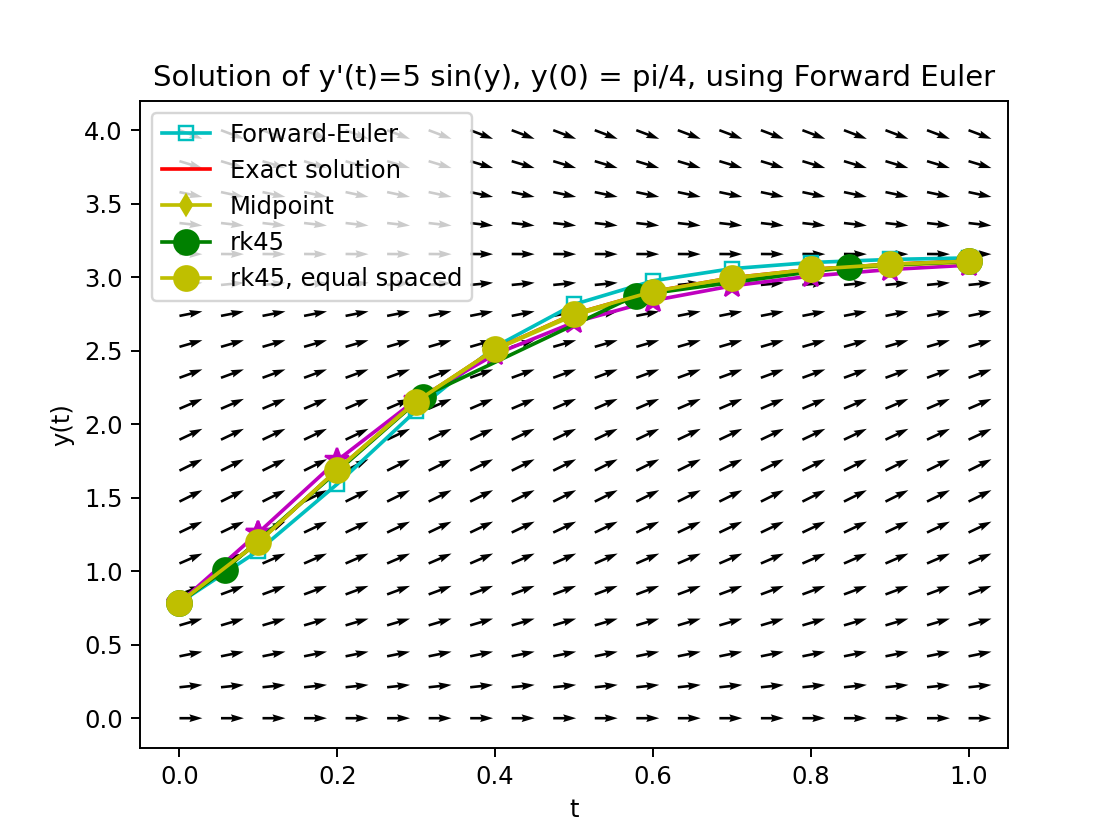

In [4]:
ax.plot(0, y0, 'm*', markersize=10)
ax.plot(dt, y1, 'm*', markersize=10)

fig

Now that this looks like it's working, we can loop and find the rest of them.

Bacwkard-Euler Error at t=1.0, with dt = 0.1, is =  0.027093671223890947


<IPython.core.display.Javascript object>


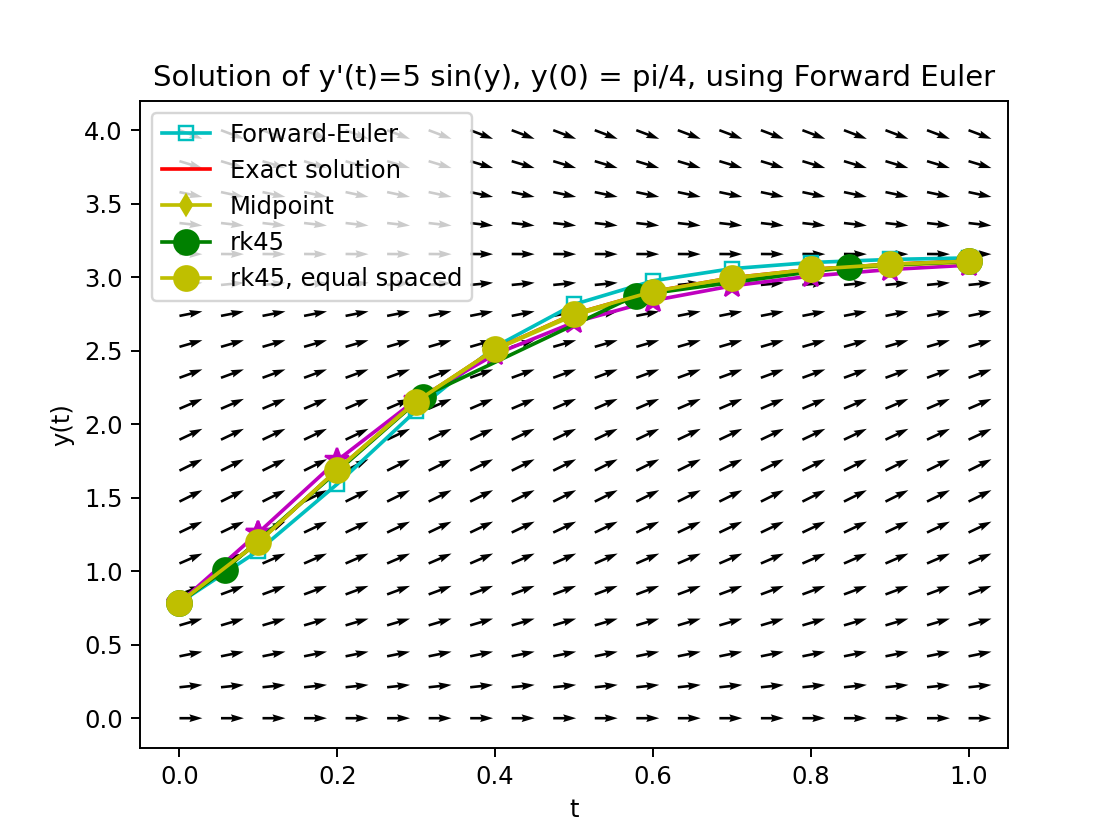

In [5]:
# Define dt
dt = 0.1

# We will solve for t between 0 and 1 with spacing dt, define t
t = np.arange(0, 1+dt, dt)

# Then predefine the array "y" which will hold our solution.
y = np.zeros(len(t))

# Then setup backward euler with the initial condition, y(0) = pi/4
y[0] = np.pi/4

# And calculate all of the other points in a for loop
for k in range(len(y)-1):
    # Setup the equation we need to solve using an anonymous function
    g = lambda z: z - y[k] - dt*f(z)
    y[k+1] = scipy.optimize.fsolve(g, y[k])
    
# Then plot it using big magenta stars with lines in between
ax.plot(t, y, 'm*-', markersize=10)

# Calculate the error and print it
error = np.abs(y_exact(1) - y[-1])
print("Bacwkard-Euler Error at t=1.0, with dt = 0.1, is = ", error)

# And show the figure
fig

Nice, this looks great! Based on our analysis of global error for the Forward-Euler method, we can guess that the error for the Backward-Euler method will be the same. We can verify by running this again using `dt = 0.01` (decrease by a factor of 10). We won't plot it, just calculate the error.

In [6]:
# Define dt
dt = 0.01

# We will solve for t between 0 and 1 with spacing dt, define t
t = np.arange(0, 1+dt, dt)

# Then predefine the array "y" which will hold our solution.
y = np.zeros(len(t))

# Then setup backward euler with the initial condition, y(0) = pi/4
y[0] = np.pi/4

# And calculate all of the other points in a for loop
for k in range(len(y)-1):
    # Setup the equation we need to solve using an anonymous function
    g = lambda z: z - y[k] - dt*f(z)
    y[k+1] = scipy.optimize.fsolve(g, y[k])

# Calculate the error and print it
error = np.abs(y_exact(1) - y[-1])
print("Bacwkard-Euler Error at t=1.0, with dt = 0.01, is = ", error)

Bacwkard-Euler Error at t=1.0, with dt = 0.01, is =  0.0025263567772535467


We can see that decreasing `dt` by a factor of 10 decreased the error by a factor of 10 as well. Indeed, **the global error for the Backward-Euler method is $\mathcal{O}(\Delta t)$**, just like for Forward-Euler. 

## A graphical recap

Recaping the two methods graphically will help us think about how to develop new methods.


<div>
<img src="FE.png" alt="Forward Euler" style="width: 200px;"/><img src="BE.png" alt="Backward Euler" style="width: 200px;"/>
</div>

Forward Euler takes the slope at the point $(t_k, y_k)$ to get $y_{k+1}$. Backward Euler takes the slope at the point $(t_{k+1}, y_{k+1})$ to get $y_{k+1}$. It does this by solving an equation (searching among all of the slopes at $t_{k+1}$ and defining $y_{k+1}$ to be the point at which the slope points backward to $y_k$. 

Both of these methods are first-order methods. We'd like to have something that is more accurate. When we were doing derivatives we averaged the forward and backward difference formulas to get a higher-order method. We'll take a similar approach here with what is called the "*midpoint method*" or "*Runge-Kutta 2 method*." 

## The midpoint method / RK2
<div>
<img src="RK2.png" alt="Midpoint method" style="width: 200px;"/>
</div>

For the midpoint method, we:
- Calculate the slope at $(t_k, y_k)$. If we followed the slope for the full time step $\Delta t$, that would be Forward Euler.
- Instead of following the slope for the full time step, we re-evaluate and find the slope *halfway along the timestep*.
- Then we use *that slope* (calculated halfway) and take a full step in that direction.

Here's the formula:
$$
k_1 = f(t_k, y_k)\\
k_2 = f\left(t_k + \frac{\Delta t}2, y_k + \frac{\Delta t}2 k_1\right)\\
y_{k+1} = y_k + \Delta t k_2
$$
We can see the different steps. In particular, we can see that $k_2$ is the slope evaluated halfway along the Forward-Euler step.

This method has *global error* equal to $\mathcal{O}(\Delta t^2)$. It is a **second-order accurate method.**

A question for you to think about: is RK2 an *implicit* or *explicit* method?

Let's solve the same IVP as before to see how this works.

The Midpoint Method Error at t=1.0, with dt = 0.01, is =  0.0059167908597919094


<IPython.core.display.Javascript object>


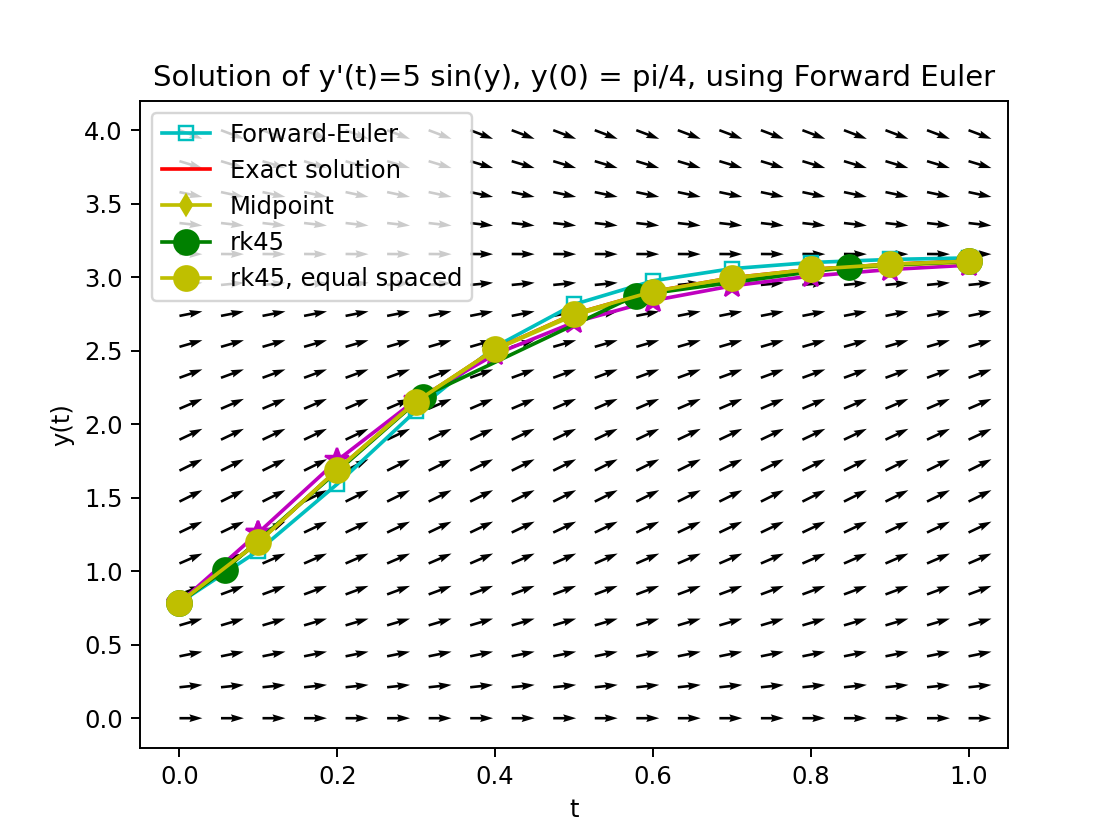

In [7]:
# Define dt
dt = 0.1

# We will solve for t between 0 and 1 with spacing dt, define t
t = np.arange(0, 1+dt, dt)

# Then predefine the array "y" which will hold our solution.
y = np.zeros(len(t))

# Then setup the midpoint method with the initial condition, y(0) = pi/4
y[0] = np.pi/4

# And calculate all of the other points in a for loop
for k in range(len(y)-1):
    # First define k_1
    k_1 = f(y[k])
    # Then define k_2
    k_2 = f(y[k] + 0.5*dt*k_1)
    # Then define y[k+1] from k_2
    y[k+1] = y[k] + dt*k_2

# Calculate the error and print it
error = np.abs(y_exact(1) - y[-1])
print("The Midpoint Method Error at t=1.0, with dt = 0.01, is = ", error)

# Then plot it using yellow diamonds with lines in between
ax.plot(t, y, 'yd-', label='Midpoint')
ax.legend()
fig

Midpoint method looks good! If evaluating the slope halfway made the method more accurate, what's to stop us from doing this more? What if we calculated 4 intermediate slopes?

## Runge-Kutta 4 (RK4)
That is the idea behind the RK4 method. RK4 is the gold-standard for finite-difference methods. It has 4th-order accuracy (global error is $\mathcal{O}(\Delta t^4)$). 

<div>
<img src="RK4.png" alt="RK4" style="width: 200px;"/>
</div>

And here's the formula:

$$
\begin{align*}
k_1 &= f(t_k, y_k)\\
k_2 &= f\left(t_k + \frac{\Delta t}{2}, y_k + \frac{\Delta t}2 k_1\right)\\
k_3 &= f\left( t_k + \frac{\Delta t}{2}, y_k + \frac{\Delta t}2 k_2\right)\\
k_4 &= f\left(t_k + \Delta t, y_k + \Delta t k_3\right)\\
y_{k+1} &= y_k + \frac{\Delta t}6\left(k_1 + 2 k_2 + 2 k_3 + k_4\right)
\end{align*}
$$

We aren't going to code this up here. You are going to do it on your homework to reinforce how you setup and use these methods in for loops! Instead, we will use a built-in integrator. As I said above, the RK4 method is the gold standard, so if you ask python to solve an ODE it does so using RK4 by default (it does something slightly more complex, but basically RK4). 

The built-in method we will use is `scipy.integrate.solve_ivp`. It technically uses a method called "RK45" due to Dormand and Prince. Here is the basic idea of how it works. 
 It solves the differential equation twice - once using RK4 and once using a fifth-order Runge-Kutta method. That is where the "45" in "RK45" comes from. It treats the fifth-order solution as if it is an exact solution  and calculates the error of RK4. If there error is too high at certain points, it will decrease dt in that region and solve again until the error is small enough at every point. This method is called the Dormand-Prince algorithm. When using `scipy.integrate.solve_ivp`, the default is to pass in a start and end time, but to not include the t values at which you want the solution. You let the algorithm determine those t values. Also, you **need to use an anonymous function with two inputs, the first being $t$ and the second being your dependent variable (here $y$)**. 

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 38
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.05755581, 0.30805887, 0.57817928, 0.84829968,
       1.        ])
 t_events: None
        y: array([[0.78539816, 1.00927345, 2.18729062, 2.87525724, 3.07148588,
        3.108741  ]])
 y_events: None
RK45 error at t=1 is =  0.0003208336339088902


<IPython.core.display.Javascript object>


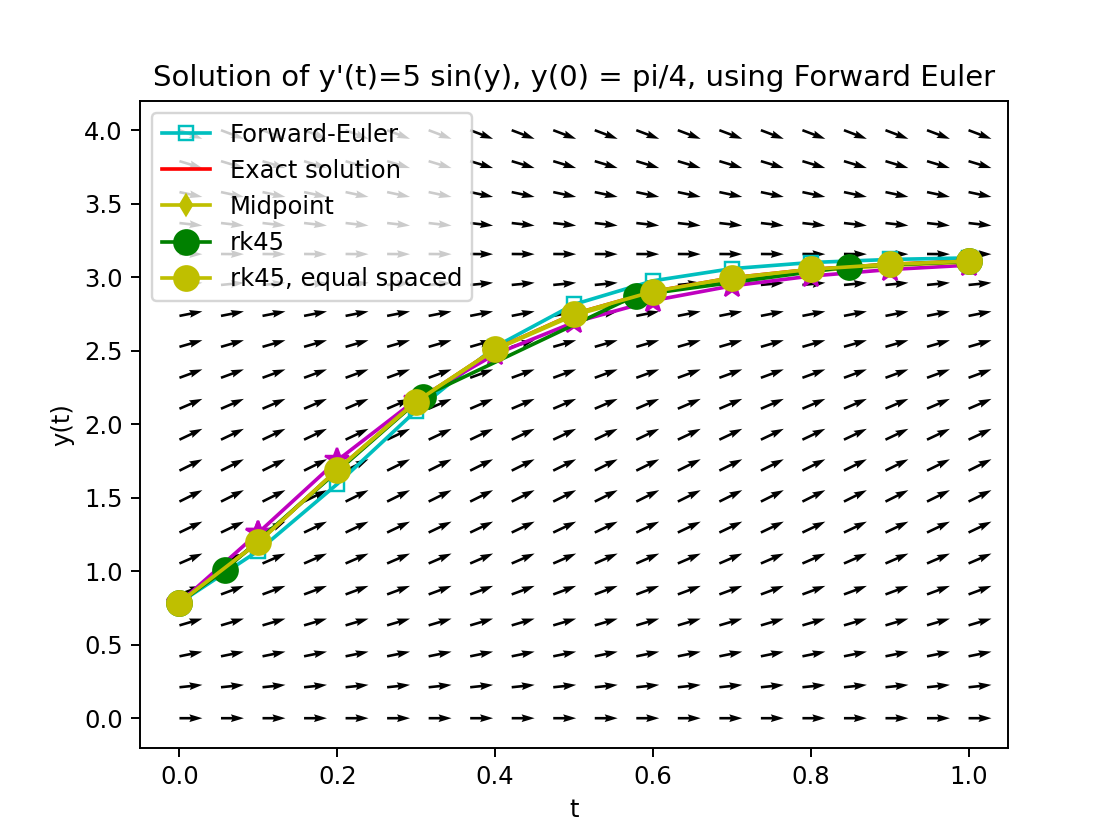

In [8]:
import scipy.integrate
# Define the anonymous function for the ODE
f = lambda t, y: 5*np.sin(y) # use t, x even if there is no t dependence
# Setup the solver. The syntax is:
# scipy.integrate.solve_ivp(ODE, [start, end], [IC])
sol = scipy.integrate.solve_ivp(f, [0, 1], [np.pi/4])
# sol is a "structure", it contains several pieces of information. 
# type print(sol) below
print(sol)

# We can extract the times at which the solution 
# is calculated using 'sol.t'
# and the corresponding numerical solution at those 
# points with "sol.y"
tsol = sol.t
xsol = sol.y[0, :]

# Plot with green circles of size 10 and label
ax.plot(tsol, xsol, 'go-', markersize=10, label='rk45')
print('RK45 error at t=1 is = ', np.abs(y_exact(1) - xsol[-1]))
ax.legend()
fig

Notice that the points are *not* equally spaced: the RK45 algorithm chooses the points itself. The Dormand-prince algorithm uses an adaptive step size (i.e. different values of `dt`) in order to try to keep the error low for all t values. So the size of the tsol and xsol vectors depends on what is needed to use as its dt values. In this case, it took 6 points (or t values) to get these results. But the error isn't that great, it is 3e-4. Let's say we want this to be at least as good as midpoint. We can pass in another argument which determines the accuracy. This is `rtol`.

We can instead tell it the points at which we want the solution using an optional argument `t_eval`.

Better RK45 error at t=1 is =  3.4959386612243293e-06


<IPython.core.display.Javascript object>


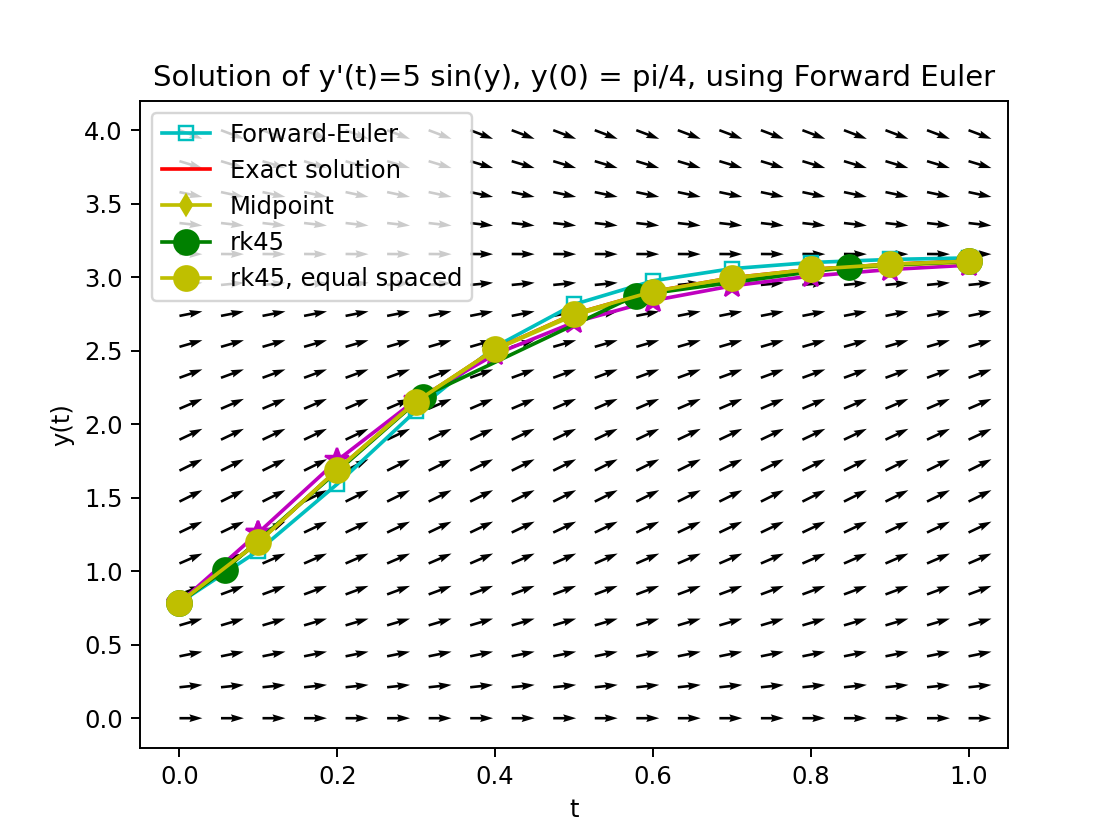

In [9]:
# Solve with t_eval = t, the equally spaced points defined before
# Use 'rtol = 1e-5'
sol = scipy.integrate.solve_ivp(f, [0, 1], [np.pi/4], t_eval = t, 
                                rtol=1e-5)

# Extract times and solution values
tsol = sol.t
xsol = sol.y[0, :]

# Calculate the error
print('Better RK45 error at t=1 is = ', np.abs(y_exact(1) - xsol[-1]))

# Plot with yellow circles of size 10 and label
ax.plot(tsol, xsol, 'yo-', markersize=10, label='rk45, equal spaced')
ax.legend()
fig

# Solving systems of ODEs using `scipy.integrate.solve_ivp`

Most interesting examples are not modeling only one thing. For instance, before we were talking about modeling populations. Populations don't exist on their own: there is interaction. 

I will introduce "systems of ODEs" through an example. We will consider model of the population of rabbits and the population of foxes. They can interact. Such a model is called a *Lotka-Volterra predator-prey model.*

Let $x(t)$ be the population of rabbits and $y(t)$ be the population of foxes. A Lotka-Volterra predator-prey model is of the form

$\frac{dx}{dt} = ax -bxy$
 
$\frac{dy}{dt} = -cy+dxy$
 
where $a$, $b$, $c$, and $d$ are constants. Let's use $a = 4,~b = 2,~ c = 1,$ and $d = 2$. We can use as initial conditions $x(0) = 1$ and $y(0) = 1$. I am using small numbers to make things easier, but you can imagine these numbers as being in units of thousands or millions. We will solve from $t = 0$ to $t = 12$.

<IPython.core.display.Javascript object>


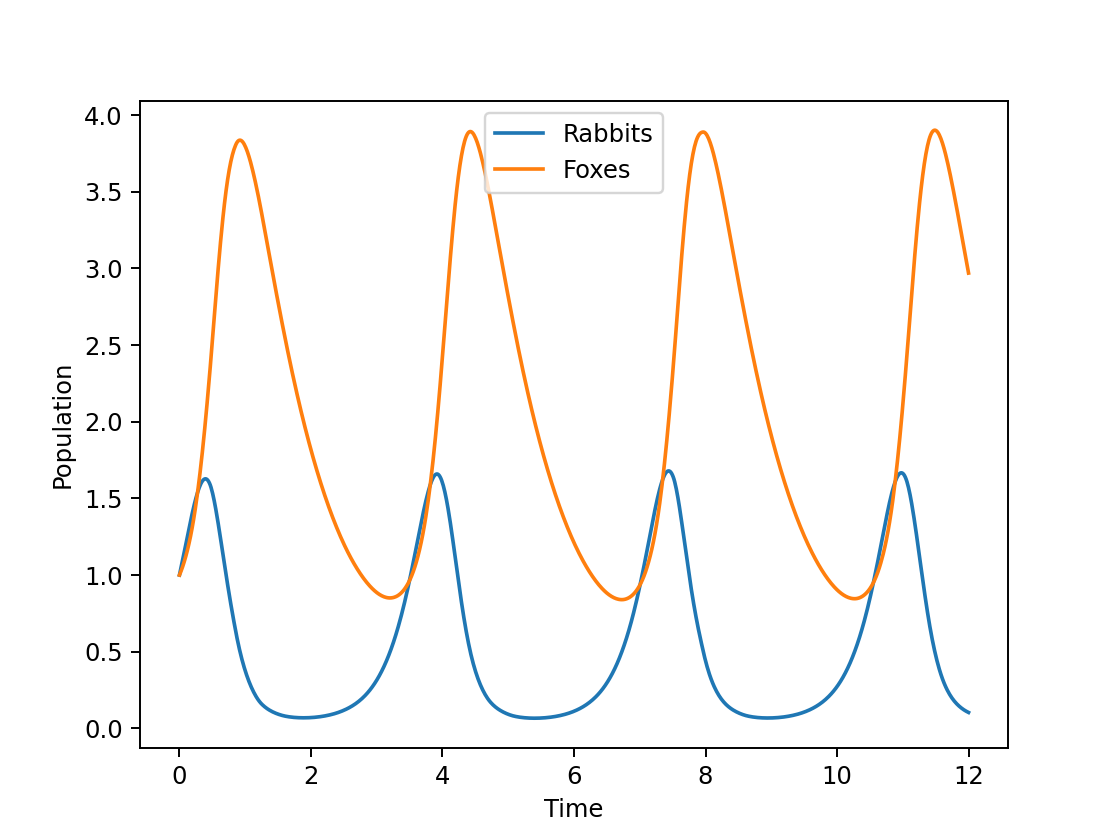

In [10]:
# First define the constants, a, b, c, d
a = 4
b = 2
c = 1
d = 2

# Then define the *two* ODEs. I've defined dxdt below, 
# you define dydt
dxdt = lambda x, y: a*x - b*x*y
dydt = lambda x, y: -c*y + d*x*y

# Now that those are defined, we need to write 
# an adapter-type function that combines the two ODEs.
# This will have two inputs: t and v = [x, y]. The vector v
# represents the vector containing the population of the two 
# species. The output should also be an array, saying how
# both species change
odefun = lambda t, v: np.array([dxdt(v[0],v[1]), dydt(v[0],v[1])])


# Now the initial condition isn't only one number. 
# We need to know the population of both species!
# The initial condition is an *array*
v0 = np.array([1, 1])

# Define 'tspan', which is the t values at which 
# we want the solution
tspan = np.linspace(0,12,1000)

# Then solve as before!
sol = scipy.integrate.solve_ivp(odefun, np.array([tspan[0], tspan[-1]]), v0, t_eval = tspan)
tsol = sol.t
vsol = sol.y

# Print out the solution, what do we have?
# Two arrays: one representing the population of the 
# rabbits for all times and one representing the foxes
# for all times. 
rabbits = vsol[0, :]
foxes = vsol[1, :]

# How do we plot it? We could plot both together:
fig2, ax2 = plt.subplots()
# This plots the rabbits
ax2.plot(tsol, rabbits, label='Rabbits')
# Now you plot the foxes
ax2.plot(tsol, foxes, label='Foxes')
ax2.set_xlabel('Time')
ax2.set_ylabel('Population')
ax2.legend()




Another (more common) way for us to visualize this is to plot the two species compared to one another. This makes sense because the populations obviously depend on one another! It also makes it easier to analyze the results. Such a plot is called a *phase portrait.*

<IPython.core.display.Javascript object>


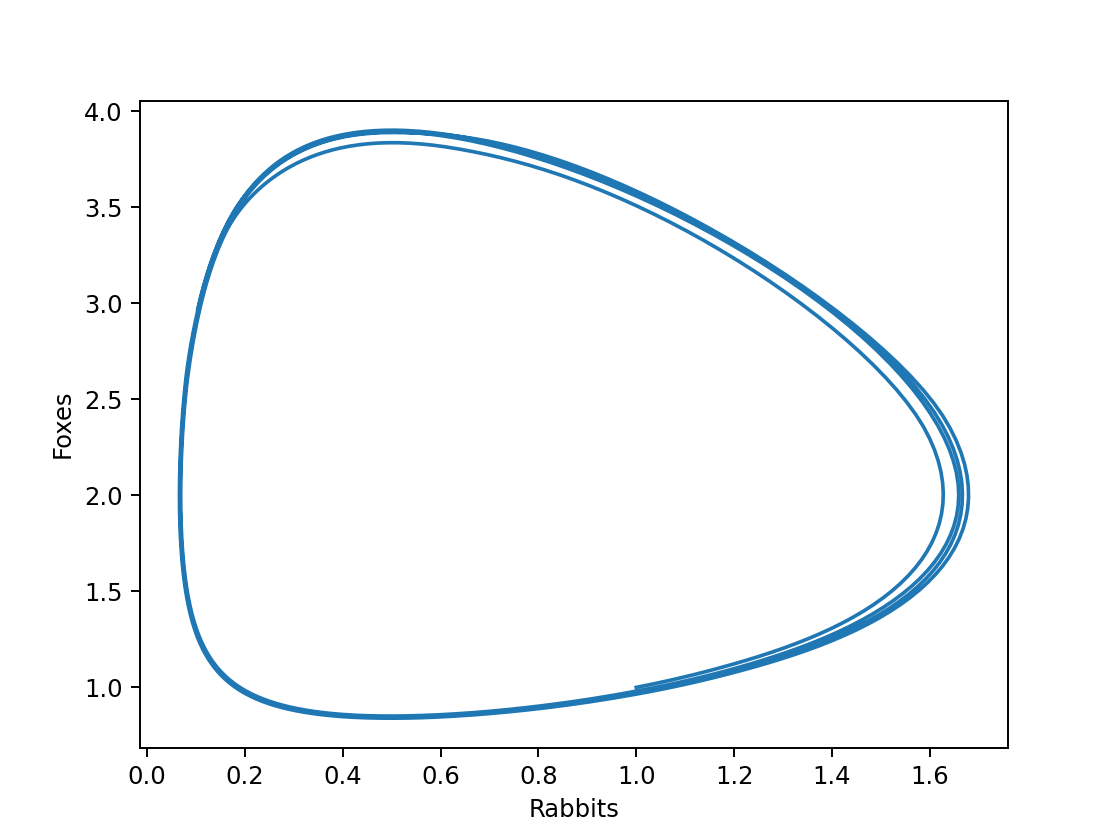

In [11]:
# Create a new figure
fig3, ax3 = plt.subplots()
# On the horizontal axis plot the rabbits
ax3.set_xlabel('Rabbits')
# On the vertical axis plot the foxes
ax3.set_ylabel('Foxes')

ax3.plot(rabbits, foxes)

We will talk a bit about how to analyze this. But can you see what's happening? How do the populations behave and relate to one another?